# TPIR Showcase Showdown

In [195]:
from src.functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


I want in this notebook to calculate the odds for various scenarios involving the "Showcase Showdown" on the game show *The Price Is Right*.

## Showcase Showdown Structure

The game works like this:

Each of three players spins a wheel with the goal of getting as close as possible to \\$1.00 without going over. A player who goes over \\$1.00 is out. If the first two players both go over \\$1.00, the third player wins automatically but still gets one spin to try to spin \\$1.00 (see below).

In the event of a tie, each of the tied players gets one spin to determine a winner.

The wheel has twenty spaces for each nickel increment between \\$0.05 and \\$1.00 (inclusive), and each player may spin once or twice, the value of the second spin being added to that of the first.

If after only one spin the current player has an amount below the current leader's amount, the current player must spin again.

There is also a bonus for reaching \\$1.00 exactly, so sometimes the third player will, even after getting an amount above the leader, spin again in an attempt to get \\$1.00.

## Defining Our Problem

With this setup there are questions of strategy. Suppose you are spinning first and you spin \\$0.60. You have a 60\% chance of going over, but that of course does not prove that you shouldn't proceed. The answer to this question depends equally on what your chances of winning are *if you stay on \\$0.60*. And this will require some calculation.

In fact, Player 1's optimal strategy will depend on Player 2's strategy, so let's start by trying to find the optimal strategy for Player 2. On which values should Player 2 stand, and on which values should Player 2 spin again?

Assuming that Player 1 is irrelevant (because of going over \\$1.00 or because of Player 2 surpassing Player 1's score on one spin), we'll prove here that Player 2 should spin again with \\$0.50 (or anything less) but stand on \\$0.55 (or anything more).

Note: When writing out equations we'll generally "divide by five" and think of a wheel with numbers from 1 to 20, instead of 5, 10, ..., 95, 100, for the sake of a more natural notation.

## Quick Digression: Player 3's Optimal Strategy

Even though Player 3 spins last, the question of the optimal strategy for Player 3 is not vacuous. It may seem so ("if your first spin is less than the leader's, spin again; it not, don't"), but this quick rule of thumb doesn't take into account the possibility of a *tie*.

So suppose Player 3 ties the leader on one spin. Should Player 3 spin again or wait for a one-spin determiner with the leader(s)?

We show here that:

- If there is a single leader, then Player 3 should spin again on a score of 45 or less; and stay on a score of 55 or more. (The strategies of spinning again and staying put on a tied score of 50 have exactly the same chances of success; we'll assume for convenience that Player  3 will spin again that case.)

- If Players 1 and 2 are already tied when Player 3 ties them on one spin, then Player 3 should spin again on a score of 65 or less; and stay on a score of 70 or more.

### One Leader

Suppose first that there is a single leader whom Player 3 ties in the first spin. It should be clear that the chances of winning in a one-spin playoff are 50-50, whereas the chances of staying under \\$1.00 are $\frac{20-z}{20}$, where:

- $z$ is the value of Player 3's first spin (and the leader's score)

These two probabilities are equal when $z=10$ (i.e. \\$0.50), and so we have the first result that Player 3 should spin again on a score of 45 or less; and stay on a score of 55 or more.

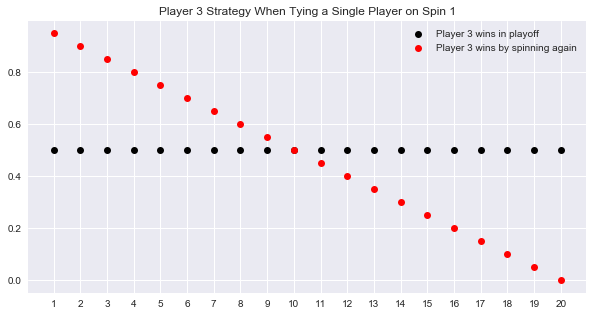

In [41]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(1, 21)

playoff_win = [0.5] * 20
spin_again_win = [(20 - x) / 20 for x in xs]

ax.plot(xs, playoff_win, 'ko', label='Player 3 wins in playoff')
ax.plot(xs, spin_again_win, 'ro', label='Player 3 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 3 Strategy When Tying a Single Player on Spin 1')
plt.legend();

### Two Leaders

If Players 1 and 2 are tied, then Player 3's optimal strategy is a bit different. Now the chances of winning a one-spin playoff are only $\frac{1}{3}$, but the chances of staying under \\$1.00 are still $\frac{20-z}{20}$, where again:

- $z$ is the value of Player 3's first spin (and the leaders' score)

*These* two probabilities are equal when $z=\frac{40}{3}$, and so we have the second result that, if Players 1 and 2 are already tied when Player 3 ties them in one spin, Player 3 should spin again on a score of 65 or less; and stay on a score of 70 or more.

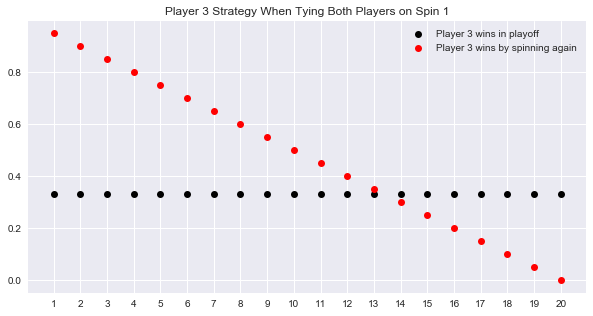

In [190]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(1, 21)

playoff_win = [1/3] * 20
spin_again_win = [(20 - x) / 20 for x in xs]

ax.plot(xs, playoff_win, 'ko', label='Player 3 wins in playoff')
ax.plot(xs, spin_again_win, 'ro', label='Player 3 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 3 Strategy When Tying Both Players on Spin 1')
plt.legend();

This discussion of Player 3's optimal strategy does not consider the benefits of going for \\$1.00 and the bonus prize, and that will be our general assumption moving forward. When analyzing Player 2's optimal strategy, we'll assume that Player 3 will follow the optimal strategy we've just worked out here.

## Player 2's Optimal Strategy

Now we turn to Player 2. Let's first calculate the probability of winning for Player 2 by spinning twice:

First of all, Player 2 has to spin so as not to produce a total greater than \\$1.00, so that's $P(not-go-over | spin) = \frac{20-S1}{20}$, where:

- S1 is the value of Player 2's first spin

The next thing that needs to happen is that Player 3 doesn't get a higher score. This could happen either because Player 3 gets less than Player 2's score on two spins or because Player 3 exceeds \\$1.00. There is also a third chance for Player 2 to win, which is that Player 3 ties Player 2 but then loses to Player 2 in a one-spin playoff.

### Player 3 Fails to Surpass Player 2 on Two Spins

Let's work out the chance of the first possibility:

$P(P3-too-small | two-spins) = \frac{1}{20}\Sigma^{P2-2}_{z=1}\frac{P2-1-z}{20}$, where:

- P2 is Player 2's score
- z is the value of Player 3's first spin

In [113]:
prob_plyr3_too_small(20)

0.4275

In [115]:
# 18/20 for first spinning $0.05
# 17/20 for first spinning $0.10
# etc.

171/400

0.4275

In [114]:
prob_plyr3_too_small(3)

0.0025

In [116]:
1/400

0.0025

In [125]:
[prob_plyr3_too_small(plyr2) for plyr2 in np.arange(1, 21)]

[0.0,
 0.0,
 0.0025,
 0.0075,
 0.015,
 0.025,
 0.0375,
 0.0525,
 0.07,
 0.09,
 0.1125,
 0.1375,
 0.165,
 0.195,
 0.2275,
 0.2625,
 0.3,
 0.34,
 0.3825,
 0.4275]

### Player 3 Exceeds \\$1.00

Let's now think about the second way in which Player 2 can win: Player 3 going over \\$1.00. We assume here that Player 3's first spin is strictly less than Player 2's score.

$P(P3-exceeds-100 | two-spins) = \frac{1}{20}\Sigma^{P2-1}_{z=1}\frac{z}{20}$, where:

- P2 is Player 2's score
- z is the value of Player 3's first spin

In [122]:
prob_plyr3_goes_over(20)

0.475

In [128]:
# 1/20 for first spinning $0.05
# 2/20 for first spinning $0.10
# etc.

190/400

0.475

In [123]:
prob_plyr3_goes_over(1)

0.0

In [124]:
prob_plyr3_goes_over(2)

0.0025

In [129]:
1/400

0.0025

In [130]:
[prob_plyr3_goes_over(plyr2) for plyr2 in np.arange(1, 21)]

[0.0,
 0.0025,
 0.0075,
 0.015,
 0.025,
 0.0375,
 0.0525,
 0.07,
 0.09,
 0.1125,
 0.1375,
 0.165,
 0.195,
 0.2275,
 0.2625,
 0.3,
 0.34,
 0.3825,
 0.4275,
 0.475]

### Player 3 Ties Player 2

The last possibility for Player 2 to win occurs when Player 3 ties Player 2 on one or two spins.

We'll assume that Player 3 follows the optimal strategy worked out above, and so that means that if Player 2's score is \\$0.50 or less, Player 3 will spin again, and otherwise Player 3 will opt for the one-spin playoff.

Where $z$ is the value of Player 3's first spin (and Player 2's score), the probability of Player 2 winning in this way is thus:

- $\left(\frac{1}{20}\right)\left(\frac{z}{20}\right)+\left(\frac{z-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)$ if $z <= 10$
- $\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)+\left(\frac{z-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)$ otherwise

In [194]:
prob_plyr3_ties_then_loses(20)

0.04875

In [134]:
1/40 + 19/800

0.04875

### Putting it All Together

We've now canvassed all the options for Player 2 to win, assuming that Player 1 is not in the picture. We started by assuming that Player 2 would spin again. But notice that our calculations will be much the same if Player 2 decides instead to stay. (But the expectation value of Player 2's score will of course be lower.)

The part that needs working out is getting from Player 2's first spin S1 to Player 2's score P2, i.e. we need to take into account the effect of Player 2's second spin.

Let's start with the idea of Player 3 failing to surpass Player 2 on two spins. Suppose Player 2 first spins \\$0.50. We said above that the probability of Player 2 winning by Player 3 failing to surpass Player 2 on two spins is: $P(P3-too-small | two-spins) = \frac{1}{20}\Sigma^{P2-2}_{z=1}\frac{P2-1-z}{20}$. If Player 2 first spins \\$0.50, then there's a 5\% chance that P2 will be \\$0.55, a 5\% chance that P2 will be \\$0.60, etc. And of course there is also a 50\% chance that Player 2 will go over \\$1.00.

In general, in terms of Player 2's two spins S1 and S2, we have:

$P(P3-too-small | first-spin) = \frac{1}{20}\Sigma^{20-S1}_{S2=1}\frac{1}{20}\Sigma^{S1+S2-2}_{z=1}\frac{S1+S2-1-z}{20}$, where:

- z is the value of Player 3's first spin

In [135]:
def plyr3_too_small_given_first_spin_plyr2(spin1):
    out = 0
    for spin2 in np.arange(1, 21-spin1):
        for z in np.arange(1, spin1+spin2-1):
            out += spin1 + spin2 - 1 - z
    return out / 8000

In [136]:
[plyr3_too_small_given_first_spin_plyr2(spin1) for spin1 in np.arange(1, 21)]

[0.1425,
 0.1425,
 0.142375,
 0.142,
 0.14125,
 0.14,
 0.138125,
 0.1355,
 0.132,
 0.1275,
 0.121875,
 0.115,
 0.10675,
 0.097,
 0.085625,
 0.0725,
 0.0575,
 0.0405,
 0.021375,
 0.0]

Now let's think about the idea of Player 3 going over \\$1.00.

Similar reasoning to the above leads us to the equation:

$P(P3-too-small | first-spin) = \frac{1}{20}\Sigma^{20-S1}_{S2=1}\frac{1}{20}\Sigma^{S1+S2-1}_{z=1}\frac{z}{20}$.

In [137]:
def plyr3_goes_over_given_first_spin_plyr2(spin1):
    out = 0
    for spin2 in np.arange(1, 21-spin1):
        for z in np.arange(1, spin1+spin2):
            out += z
    return out / 8000

In [138]:
[plyr3_goes_over_given_first_spin_plyr2(spin1) for spin1 in np.arange(1, 21)]

[0.16625,
 0.166125,
 0.16575,
 0.165,
 0.16375,
 0.161875,
 0.15925,
 0.15575,
 0.15125,
 0.145625,
 0.13875,
 0.1305,
 0.12075,
 0.109375,
 0.09625,
 0.08125,
 0.06425,
 0.045125,
 0.02375,
 0.0]

There is the final case of Player 3 tying Player 2 and then losing.

$P(P3-ties-then-loses | first-spin) = \frac{1}{20}\Sigma^{10-S1}_{S2=1}\left[\left(\frac{1}{20}\right)\left(\frac{S1+S2}{20}\right)+\left(\frac{S1+S2-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)\right]+\frac{1}{20}\Sigma^{20-S1}_{S2=11-S1, S2>0}\left[\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)+\left(\frac{S1+S2-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)\right]$.

In order to deal with the starting index for the second sum, we'll take the max of {11-S1, 1}.

In [139]:
def plyr3_ties_then_loses_given_first_spin_plyr2(spin1):
    out = 0
    start = max(11-spin1, 1)
    for spin2 in np.arange(1, 11-spin1):
        out += (spin1+spin2) / 20 + (spin1+spin2-1) / 40
    for spin2 in np.arange(start, 21-spin1):
        out += 1 / 2 + (spin1+spin2-1) / 40
    return out / 400

In [140]:
[plyr3_ties_then_loses_given_first_spin_plyr2(spin1) for spin1 in np.arange(1, 21)]

[0.031125,
 0.0308125,
 0.0303125,
 0.029625,
 0.02875,
 0.027687499999999997,
 0.0264375,
 0.025,
 0.023375,
 0.0215625,
 0.0196875,
 0.01775,
 0.01575,
 0.013687499999999998,
 0.0115625,
 0.009375000000000001,
 0.007125,
 0.0048125,
 0.0024375,
 0.0]

In [178]:
def plyr2_defeats_plyr3(plyr2, spin_again=True):
    prob = 1
    if spin_again:
        plyr3_too_small = plyr3_too_small_given_first_spin_plyr2(plyr2)
        plyr3_goes_over = plyr3_goes_over_given_first_spin_plyr2(plyr2)
        plyr3_ties_then_loses = plyr3_ties_then_loses_given_first_spin_plyr2(plyr2)
    
    else:
        plyr3_too_small = prob_plyr3_too_small(plyr2)
        plyr3_goes_over = prob_plyr3_goes_over(plyr2)
        plyr3_ties_then_loses = prob_plyr3_ties_then_loses(plyr2)
    
    prob *= (plyr3_too_small + plyr3_goes_over + plyr3_ties_then_loses)
    
    return prob

In [179]:
plyr2_defeats_plyr3(20, spin_again=False)

0.9512499999999999

In [180]:
plyr2_defeats_plyr3(20, spin_again=True)

0.0

In [181]:
plyr2_defeats_plyr3(10, spin_again=False)

0.23875000000000002

In [182]:
plyr2_defeats_plyr3(10, spin_again=True)

0.2946875

In [183]:
stay = [plyr2_defeats_plyr3(x, spin_again=False) for x in np.arange(1, 21)]

In [184]:
spin_again = [plyr2_defeats_plyr3(x, spin_again=True) for x in np.arange(1, 21)]

In [187]:
probs = list(zip(stay, spin_again))
probs

[(0.0025, 0.339875),
 (0.00875, 0.3394375),
 (0.02, 0.3384375),
 (0.03625, 0.336625),
 (0.0575, 0.33375),
 (0.08374999999999999, 0.3295625),
 (0.11499999999999999, 0.3238125),
 (0.15125, 0.31625000000000003),
 (0.1925, 0.306625),
 (0.23875000000000002, 0.2946875),
 (0.2875, 0.2803125),
 (0.34125, 0.26325),
 (0.39999999999999997, 0.24324999999999997),
 (0.46375, 0.2200625),
 (0.5325, 0.1934375),
 (0.60625, 0.163125),
 (0.685, 0.128875),
 (0.76875, 0.0904375),
 (0.8575, 0.0475625),
 (0.9512499999999999, 0.0)]

In [192]:
player2probsdf = pd.DataFrame(probs,
             columns=['prob_win_if_stay', 'prob_win_if_spin_again'],
            index=np.arange(5, 101, 5))
player2probsdf

,prob_win_if_stay,prob_win_if_spin_again
5,0.00250,0.339875
10,0.00875,0.339438
15,0.02000,0.338438
20,0.03625,0.336625
25,0.05750,0.333750
30,0.08375,0.329562
35,0.11500,0.323813
40,0.15125,0.316250
45,0.19250,0.306625
50,0.23875,0.294687


We can see from this list of probabilities of winning for Player 2 for each strategy that:

- Player 2 should spin again if the first spin is less than 55 cents
- Player 2 should stay if the first spin is greater than or equal to 55 cents
- 55 cents is the worst first spin in the sense that the function `max(P(win| stay), P(win | spin again))` is at its minimum.

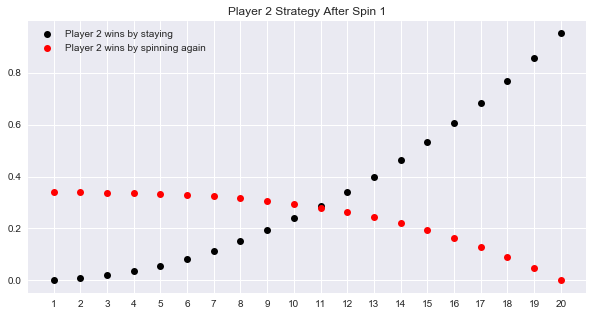

In [193]:
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(1, 21)

stay_win = player2probsdf['prob_win_if_stay']
spin_again_win = player2probsdf['prob_win_if_spin_again']

ax.plot(xs, stay_win, 'ko', label='Player 2 wins by staying')
ax.plot(xs, spin_again_win, 'ro', label='Player 2 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 2 Strategy After Spin 1')
plt.legend();

## Player 1's Optimal Strategy

We'll prove here that Player 1 should spin again with \\$0.65 but stand on \\$0.70.

Let's first calculate the probability of winning if Player 1 spins \\$0.65 and then spins again:

First of all, Player 1 cannot spin so as to produce a total greater than \\$1.00, so that's
$P(not-go-over | spin) = \frac{7}{20}$. Let's suppose that Player 1 spins *x* (and that $0.65 + x <= \$1.00$). What are the chances that \\$0.65 + x will be a winning score? We can simply enumerate the possibilities:

In [3]:
first_player()

Player1 spun 80 cents. Will Player1 spin again?
Yes or No: No


80

In [4]:
second_player(85)

Player2 spun 5.
Player2 must spin again.
Player2 spun 90.
Player2 has 95.


95

In [370]:
def third_player(play1, play2):
    scores = dict(enumerate([play1, play2], start=1))
    leader = {k: v for k, v in scores.items() if v == max(scores.values())}
    leader_val = [v for v in leader.values()][0]
    if len(leader) == 2:
        print(f'Player1 and Player2 are tied at {play1}!')
    else:
        leader_num = [k for k in leader.keys()][0]
        print(f'Player{leader_num} has {leader_val}.')
    choices = [5*i for i in range(1, 21)]
    spin1 = np.random.choice(choices)
    print(f'Player3 spun {spin1}.')
    if spin1 > leader_val:
        print(f'Does Player3 want to go for the $1.00?')
        choice = input('Yes or No: ')
        if choice == 'Yes':
            spin2 = np.random.choice(choices)
            if spin1 + spin2 > 100:
                play3 = 0
                print('Player3 is over!')
            else:
                play3 = spin1 + spin2
                print(f'Player3 wins with {play3}.')
        else:
            play3 = spin1
            print(f'Player3 wins with {play3}.')
        return play3
    elif spin1 == leader_val:
        if len(leader) == 2:
            print(f'We have a three-way tie at {leader_val}!')
            print(f'Does Player3 want to spin again?')
            choice = input('Yes or No: ')
            if choice == 'Yes':
                spin2 = np.random.choice(choices)
                if spin1 + spin2 > 100:
                    play3 = 0
                    print('Player3 is over!')
                else:
                    play3 = spin1 + spin2
                    print(f'Player3 wins with {play3}.')
            else:
                print(f'Each player gets one more spin.')
                play1f = np.random.choice(choices)
                print(f'Player1 spun {play1f}.')
                play2f = np.random.choice(choices)
                print(f'Player2 spun {play2f}.')
                if play2f == play1f:
                    print('Player2 must spin again.')
                    play2f += np.random.choice(choices)
                    if play2f > 100:
                        print('Player2 is over!')
                        play2f = 0
                elif play2f < play1f:
                    play2f = 0
                else:
                    play1f = 0
                    print(f'Player2 leads with {play2f}.')
                play3f = np.random.choice(choices)
                print(f'Player3 spun {play3f}.')
                if play3f == play1f or play3f == play2f:
                    print('Player3 must spin again.')
                    play3f += np.random.choice(choices)
                    if play3f > 100:
                        print('Player3 is over!')
                        play3f = 0
                finals = dict(enumerate([play1f, play2f, play3f], start=1))
                winner = {k: v for k, v in finals.items() if v == max(finals.values())}
                print(f'The winner is {[k for k in winner.keys()][0]}!')
                return play3f
        else:
            print(f'We have a tie at {leader_val}!')
            print(f'Does Player3 want to spin again?')
            choice = input('Yes or No: ')
            if choice == 'Yes':
                spin2 = np.random.choice(choices)
                if spin1 + spin2 > 100:
                    play3 = 0
                    print('Player3 is over!')
                else:
                    play3 = spin1 + spin2
                    print(f'Player3 wins with {play3}.')
            else:
                print(f'We have a tie between Player3 and Player{leader_num}.')
                print(f'Each player gets one more spin.')
                play1f = np.random.choice(choices)
                print(f'Player{leader_num} spun {play1f}.')
                play2f = np.random.choice(choices)
                print(f'Player3 spun {play2f}.')
                if play2f == play1f:
                    print('Player3 must spin again.')
                    play2f += np.random.choice(choices)
                    if play2f > 100:
                        print('Player3 is over!')
                        play2f = 0
                elif play2f < play1f:
                    play2f = 0
                    print(f'Player3 can\'t beat Player{leader_num}!')
                else:
                    play1f = 0
                    print(f'Player3 wins with {play2f}.')
    else:
        print('Player3 must spin again.')
        spin2 = np.random.choice(choices)
        print(f'Player3 spun {spin2}.')
        if spin1 + spin2 > 100:
            play3 = 0
            print('Player3 is over!')
        elif spin1 + spin2 < leader_val:
            play3 = 0
            print('Player3 can\'t beat Player1 and Player2!')
        else:
            play3 = spin1 + spin2
            if play3 > leader_val:
                print(f'Player3 wins with {play3}.')
            else:
                print(f'We have a tie between Player3 and Player{leader_num}.')
                print(f'Each player gets one more spin.')
                play1f = np.random.choice(choices)
                print(f'Player{leader_num} spun {play1f}.')
                play2f = np.random.choice(choices)
                print(f'Player3 spun {play2f}.')
                if play2f == play1f:
                    print('Player3 must spin again.')
                    play2f += np.random.choice(choices)
                    if play2f > 100:
                        print('Player3 is over!')
                        play2f = 0
                elif play2f < play1f:
                    play2f = 0
                    print(f'Player3 can\'t beat Player{leader_num}!')
                else:
                    play1f = 0
                    print(f'Player3 wins with {play2f}.')
        return play3

In [371]:
third_player(10, 30)

Player2 has 30.
Player3 spun 25.
Player3 must spin again.
Player3 spun 70.
Player3 wins with 95.


95

In [372]:
third_player(40, 60)

Player2 has 60.
Player3 spun 5.
Player3 must spin again.
Player3 spun 20.
Player3 can't beat Player1 and Player2!


0

In [373]:
def play_full():
    play1 = first_player()
    play2 = second_player(play1)
    play3 = third_player(play1, play2)

In [374]:
play_full()

Player1 spun 40 cents. Will Player1 spin again?
Yes or No: Yes
Player1 spun 60.
Player1 has 100.
Player2 spun 90.
Player2 must spin again.
Player2 spun 75.
Player2 is over!
Player1 has 100.
Player3 spun 65.
Player3 must spin again.
Player3 spun 15.
Player3 can't beat Player1 and Player2!


In [375]:
play_full()

Player1 spun 45 cents. Will Player1 spin again?
Yes or No: No
Player2 spun 25.
Player2 must spin again.
Player2 spun 25.
Player2 has 50.
Player2 has 50.
Player3 spun 30.
Player3 must spin again.
Player3 spun 75.
Player3 is over!


In [376]:
play_full()

Player1 spun 35 cents. Will Player1 spin again?
Yes or No: Yes
Player1 spun 20.
Player1 has 55.
Player2 spun 55.
Player2 spun 55 cents. Will Player2 spin again?
Yes or No: Yes
Player2 spun 50.
Player2 is over!
Player1 has 55.
Player3 spun 45.
Player3 must spin again.
Player3 spun 90.
Player3 is over!


In [151]:
wheel = [i for i in range(5, 101, 5)]

In [152]:
def stats_player1(choices=wheel, spin_again=True, spin_first=None,
                 opt_strategy=False):
    if spin_first is None:
        spin1 = np.random.choice(choices)
    else:
        spin1 = spin_first
    if opt_strategy:
        if spin1 > 65:
            spin_again=False
        else:
            spin_again=True
    if spin_again:
        spin2 = np.random.choice(choices)
        if spin1 + spin2 > 100:
            play1 = 0
        else:
            play1 = spin1 + spin2
    else:
        play1 = spin1
    return play1

In [293]:
stats_player1(spin_again=False)

75

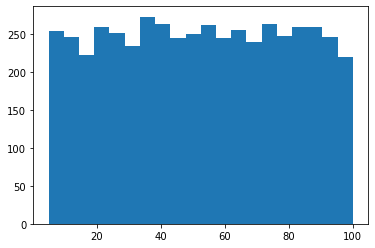

In [294]:
spins1 =  []
for _ in range(5000):
    spins1.append(stats_player1(spin_again=False))

plt.hist(spins1, bins=20);

In [153]:
def stats_player2(play1, choices=wheel, spin_again=True, spin_first=None,
                 opt_strategy=False):
    if spin_first is None:
        spin1 = np.random.choice(choices)
    else:
        spin1 = spin_first
    if opt_strategy:
        if spin1 == play1:
            if play1 > 65:
                spin_again = False
        elif spin1 > 50:
            spin_again = False
        else:
            spin_again = True
    if spin1 < play1:
        spin_again = True
    if spin_again:
        spin2 = np.random.choice(choices)
        if spin1 + spin2 > 100 or spin1 + spin2 < play1:
            play2 = 0
        else:
            play2 = spin1 + spin2
    else:
        play2 = spin1
    return play2

In [154]:
def stats_player3(leader, tie=False, choices=wheel, spin_again=True,
                  spin_first=None, opt_strategy=False, gofordollar=False):
    if spin_first is None:
        spin1 = np.random.choice(choices)
    else:
        spin1 = spin_first
    if opt_strategy:
        if spin1 == leader:
            if tie:
                if leader > 65:
                    spin_again = False
                else:
                    spin_again = True
            else:
                if leader > 50:
                    spin_again = False
                else:
                    spin_again = True
    if spin1 < leader:
        spin_again = True
    if leader == 0:
        spin_again = False
    if spin1 > leader:
        if gofordollar == True:
            spin_again = True
        else:
            spin_again = False
    if spin_again:
        spin2 = np.random.choice(choices)
        if spin1 + spin2 > 100 or spin1 + spin2 < leader:
            play3 = 0
        else:
            play3 = spin1 + spin2
    else:
        play3 = spin1
    return play3

In [155]:
def showcase_showdown(plr1_first, plr1_again, plr2_first, plr2_again,
                      plr3_first, plr3_again, plr1os=False, plr2os=False,
                      plr3os=False, plr3gfd=False, tie=False):
    import numpy as np
    wheel = [i for i in range(5, 101, 5)]
    plr1 = stats_player1(spin_again=plr1_again, spin_first=plr1_first,
                        opt_strategy=plr1os)
    plr2 = stats_player2(play1=plr1, spin_again=plr2_again,
                         spin_first=plr2_first, opt_strategy=plr2os)
    if plr1 > plr2:
        leader = plr1
    else:
        leader = plr2
    plr3 = stats_player3(leader, spin_again=plr3_again,
                         spin_first=plr3_first, opt_strategy=plr3os,
                         gofordollar=plr3gfd, tie=tie)
    
    score_dict = dict(enumerate([plr1, plr2, plr3], start=1))
    
    wnr = {k: v for k, v in score_dict.items() if v == max(score_dict.values())}
    
    if len(wnr) > 1:
        return np.random.choice([k for k in wnr.keys()])
    else:
        return [k for k in wnr.keys()][0]

In [298]:
showcase_showdown(5, False, 10, False, 20, True)

3

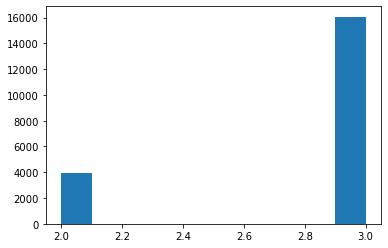

In [299]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(20, False, 45, False, None, True))
plt.hist(results);

### Player1 Spins 60

#### Stay

Player1 won 11.82% of the time.


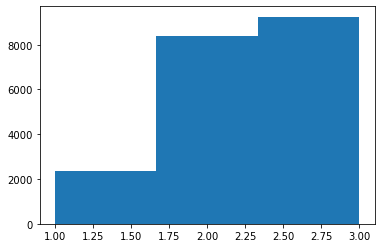

In [300]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(60, False, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

#### Spin Again

Player1 won 18.305% of the time.


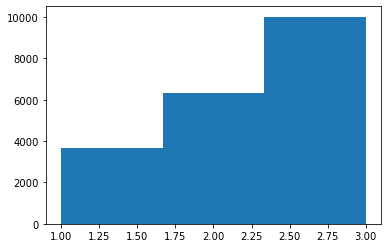

In [301]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(60, True, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

### Player 1 Spins 65

#### Stay

Player1 won 16.175% of the time.


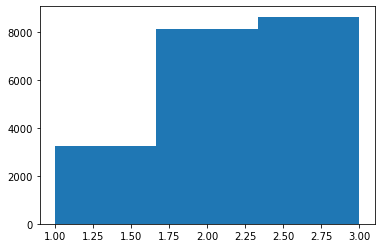

In [302]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(65, False, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

####  Spin Again

Player1 won 17.975% of the time.


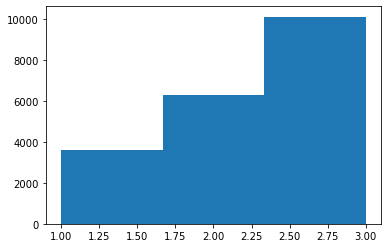

In [303]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(65, True, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

### Player 1 Spins 70

#### Stay

Player1 won 21.62% of the time.


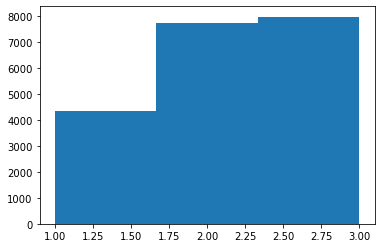

In [304]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(70, False, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

#### Spin Again

Player1 won 17.03% of the time.


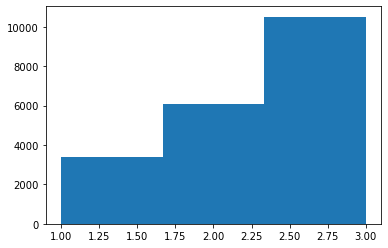

In [305]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(70, True, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

### Player 2 Spins 50

#### Stay

Player2 won 23.825% of the time.


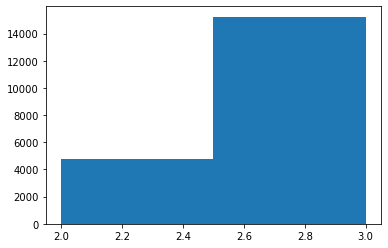

In [307]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(0, False, 50, False, None, False))
hist = plt.hist(results, bins=2)
print(f"Player2 won {hist[0][0]/200}% of the time.")

#### Spin Again

Player2 won 28.775% of the time.


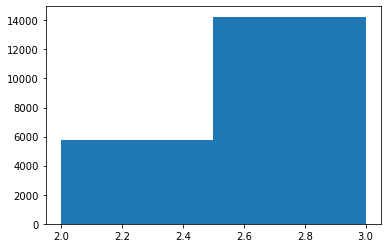

In [308]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(0, False, 50, True, None, False))
hist = plt.hist(results, bins=2)
print(f"Player2 won {hist[0][0]/200}% of the time.")

### Player 2 Spins 55

#### Stay

Player2 won 28.88% of the time.


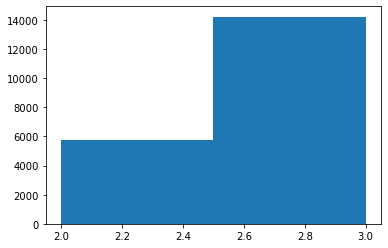

In [309]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(0, False, 55, False, None, False))
hist = plt.hist(results, bins=2)
print(f"Player2 won {hist[0][0]/200}% of the time.")

#### Spin Again

Player2 won 27.96% of the time.


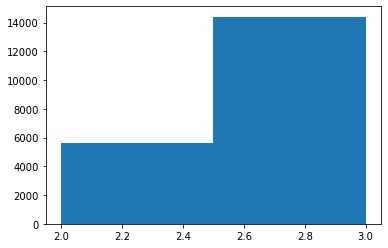

In [310]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(0, False, 55, True, None, False))
hist = plt.hist(results, bins=2)
print(f"Player2 won {hist[0][0]/200}% of the time.")

### Results with Optimal Strategy

Player1 won 30.985% of the time.
Player2 won 32.425% of the time.
Player3 won 36.59% of the time.


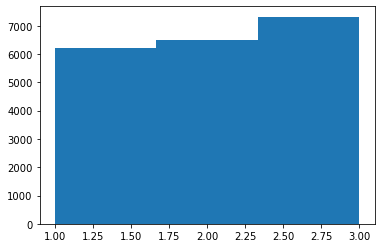

In [316]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(None, False, None, False, None, False,
                                     plr1os=True, plr2os=True, plr3os=True))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

Player1 won 37.815% of the time.
Player2 won 42.43% of the time.
Player3 won 19.755% of the time.


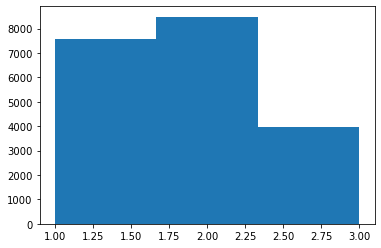

In [317]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(None, False, None, False, None, False,
                                     plr1os=True, plr2os=True, plr3gfd=True))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

### Optimal Strategy for Player 2 if They Tie Player 1

#### 55 Cents, Stay

Player1 won 15.04% of the time.
Player2 won 15.37% of the time.
Player3 won 69.59% of the time.


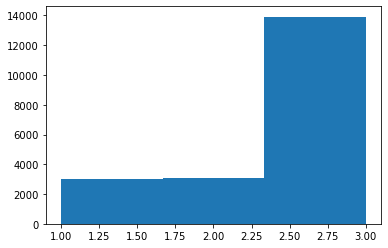

In [252]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(55, False, 55, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 55 Cents, Spin Again

Player1 won 15.91% of the time.
Player2 won 28.17% of the time.
Player3 won 55.92% of the time.


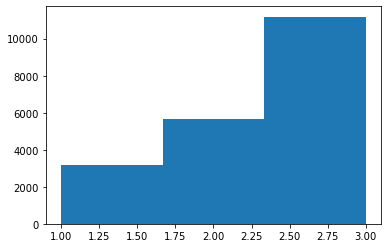

In [253]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(55, False, 55, True, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 60 Cents, Stay

Player1 won 18.045% of the time.
Player2 won 17.92% of the time.
Player3 won 64.035% of the time.


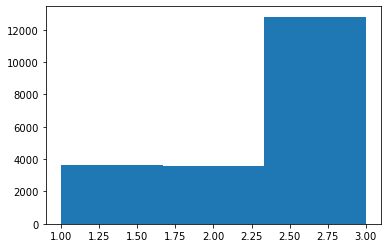

In [254]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(60, False, 60, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 60 Cents, Spin Again

Player1 won 19.91% of the time.
Player2 won 26.38% of the time.
Player3 won 53.71% of the time.


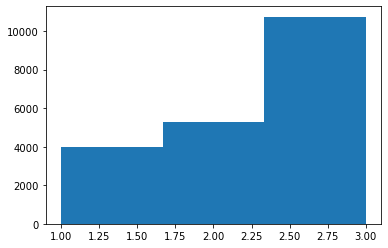

In [255]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(60, False, 60, True, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 65 Cents, Stay

Player1 won 20.415% of the time.
Player2 won 20.93% of the time.
Player3 won 58.655% of the time.


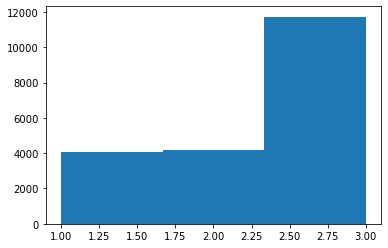

In [256]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(65, False, 65, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 65 Cents, Spin Again

Player1 won 26.07% of the time.
Player2 won 24.26% of the time.
Player3 won 49.67% of the time.


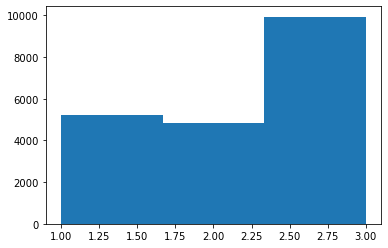

In [257]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(65, False, 65, True, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 70 Cents, Stay

Player1 won 23.89% of the time.
Player2 won 23.555% of the time.
Player3 won 52.555% of the time.


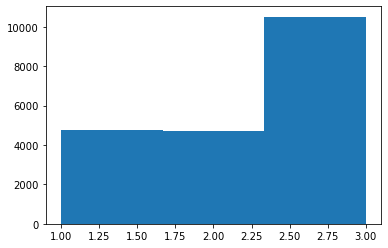

In [262]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(70, False, 70, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 70 Cents, Spin Again

Player1 won 32.27% of the time.
Player2 won 21.98% of the time.
Player3 won 45.75% of the time.


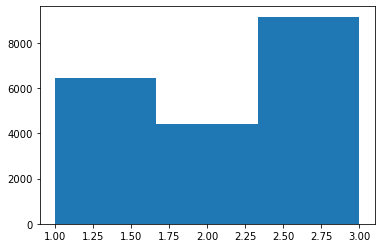

In [263]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(70, False, 70, True, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

In [ ]:
plyr2_win = np.zeros(20)
plyr2_lose = np.zeros(20)
for plyr2spin1 in np.arange(1, 21):
    for plyr2spin2 in np.arange(1, 21):
        for plyr3spin1 in np.arange(1, 21):
            for plyr3spin2 in np.arange(1, 21):
                if plyr2spin1 + plyr2spin2 > 20:
                    plyr2_lose[plyr2spin1-1] += 1
                elif plyr2spin1 + plyr2spin2 > plyr3spin1 + plyr3spin2:
                    plyr2_win[plyr2spin1-1] += 1
                elif plyr3spin1 + plyr3spin2 > 20:
                    plyr2_win[plyr2spin1-1] += 1
                elif plyr2spin1 + plyr2spin2 == plyr3spin1:
                    if plyr3spin1 > 10:
                        choice = np.random.choice([2, 3])
                        if choice == 2:
                            plyr2_win[plyr2spin1-1] += 1
                        else:
                            plyr2_lose[plyr2spin1-1] += 1
                    else:
                        plyr3tot = plyr3spin1 + plyr3spin2
                        if plyr3tot <= 20:
                            plyr2_lose[plyr2spin1-1] += 1
                        else:
                            plyr2_win[plyr2spin1-1] += 1
                elif plyr2spin1 + plyr2spin2 == plyr3spin1 + plyr3spin2:
                    choice = np.random.choice([2, 3])
                    if choice == 2:
                        plyr2_win[plyr2spin1-1] += 1
                    else:
                        plyr2_lose[plyr2spin1-1] += 1
                else:
                    plyr2_lose[plyr2spin1-1] += 1
print(plyr2_win, plyr3_win)

In [103]:
plyr2_win = np.zeros(20)
plyr2_lose = np.zeros(20)
for plyr2spin1 in np.arange(1, 21):
    for plyr3spin1 in np.arange(1, 21):
        for plyr3spin2 in np.arange(1, 21):
            if plyr2spin1 > plyr3spin1 + plyr3spin2:
                plyr2_win[plyr2spin1-1] += 1
            elif plyr3spin1 > plyr2spin1:
                plyr2_lose[plyr2spin1-1] += 1
            elif plyr3spin1 + plyr3spin2 > 20:
                plyr2_win[plyr2spin1-1] += 1
            elif plyr2spin1 == plyr3spin1:
                if plyr3spin1 > 10:
                    choice = np.random.choice([2, 3])
                    if choice == 2:
                        plyr2_win[plyr2spin1-1] += 1
                    else:
                        plyr2_lose[plyr2spin1-1] += 1
                else:
                    plyr3tot = plyr3spin1 + plyr3spin2
                    if plyr3tot <= 20:
                        plyr2_lose[plyr2spin1-1] += 1
                    else:
                        plyr2_win[plyr2spin1-1] += 1
            elif plyr2spin1 == plyr3spin1 + plyr3spin2:
                choice = np.random.choice([2, 3])
                if choice == 2:
                    plyr2_win[plyr2spin1-1] += 1
                else:
                    plyr2_lose[plyr2spin1-1] += 1
            else:
                plyr2_lose[plyr2spin1-1] += 1
print(plyr2_win, plyr3_win)

[5242. 5023. 4828. 4604. 4389. 4173. 3949. 3711. 3470. 3209. 2948. 2683.
 2390. 2086. 1791. 1458. 1123.  762.  392.    0.] [5432. 5431. 5421. 5420. 5423. 5411. 5386. 5356. 5337. 5284. 5235. 5187.
 5105. 5023. 4932. 4815. 4686. 4540. 4379. 4200.]
